## Introduction



**Earthquake Analysis for Washington State (1904-2024)**

This Python code is designed to perform a comprehensive analysis of earthquake data 
specific to Washington State, spanning from the year 1904 to 2024. The data, sourced 
from the United States Geological Survey (USGS.gov), provides an extensive record of 
seismic activities that have impacted the region over the past century. Our analysis 
aims to accomplish the following objectives:

1. Identify Cities Most Affected by Earthquakes:
   Through detailed data exploration, we determine which cities in Washington State 
   have been most affected by earthquakes. This involves analyzing the geographical 
   distribution of earthquake epicenters and correlating them with nearby urban centers 
   to assess the impact on populated areas.

2. Plot Historical Earthquake Data Alongside Fault Lines:
   Utilizing visualization libraries such as Matplotlib and Folium, we plot the historical 
   earthquake data on a map of Washington State. This visual representation is enhanced 
   by overlaying known fault lines, providing a clear picture of the relationship between 
   seismic activities and geological structures.

3. Statistical Analysis:
   We delve into the earthquake dataset to uncover relevant statistics, including the 
   frequency of earthquakes over time, magnitude distributions, and depth analysis. 
   These statistics offer insights into the seismic activity patterns and trends within 
   the state.

4. Future Earthquake Probabilities:
   Leveraging machine learning techniques, we build predictive models to estimate the 
   probabilities of future earthquakes in Washington State. These models consider 
   various features, including historical magnitudes, depths, and locations, to make 
   informed predictions about future seismic events.

By combining data analysis, visualization, statistical methods, and machine learning, 
this project seeks to provide a detailed understanding of earthquake risks in Washington 
State. The findings aim to inform residents, policymakers, and researchers about past 
impacts and future risks, contributing to improved preparedness and response strategies 
for seismic activities.


### Project Outline Map
1. Data Exploration
- 1.1 Data Description
- 1.2 Data

2. Exploratory Data Analysis
 - 2.1 Data Cleaning
 - 2.2 Adding Columns
 - 2.3 Univariate Analysis
 - 2.4 Multivariate Analysis
 
3. Temporal analysis
 - 3.1 Cities with more than 20 earthquakes 
 - 3.2 Cities with Lowest and Highest frequencies of earthquakes
 - 3.3 Earthquake Frequency and Magnitude Over Time
 - 3.4 Time of Day/Year Analysis
 
4. Spatial analysis
 - 4.1 View Earthquakes Locations
 - 4.2 Fault Lines

5. Target Variable Analysis
 - 5.1 Cities that experienced the largest Magnitude Earthquakes
 - 5.2 Depth Analysis: Correlation Between Earthquake Depth and Magnitude
 - 5.3 Spatial Clustering

6. Statistical Methods
 - 6.1 Moran's I
 - 6.2 Poisson distribution

7. Machine Learning Regressive Models
 - 7.1 Model Prep
 - 7.2 MLPRegressor()
 - 7.3 Average Ensemble
 - 7.4 BOOSTING - AdaBoost
 - 7.5 TensorFlow
 - 7.6 Regressor Model Analysis
 
8. Machine Learning Classifier Models
 - 8.1 Model Prep
 - 8.2 RandomForestClassifier()
 - 8.3 MLPClassifier()
 - 8.4 Majority Ensemble
 - 8.5 Stacking Ensemble
 - 8.6 Bagging Ensemble
 - 8.7 Classifier Model Analysis
 
9. Earthquake Model Predictions and Visualizations
 - 9.1 Classification of real earthquake locations to random noise
 - 9.2 Regression Model piped nto Classifier Model to predict probabilities of different magnitudes
 
10. Combined Layers Map
  
11. Final Analysis

12. References and Rescources

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime
# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from folium import IFrame
from shapely.geometry import Point
# Modeling
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Scoring
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Classifiers
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import StackingClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
# Regressors
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
# Statistics
from libpysal.weights import DistanceBand
from esda.moran import Moran
from scipy.stats import poisson
# Misc
import warnings
warnings.filterwarnings("ignore")

In [2]:
print('pandas v' + pd.__version__)
print('numpy v' + np.__version__)
print('seaborn v' + sns.__version__)
print('geopandas v' + gpd.__version__)
print('folium v' + folium.__version__)
print('tensorflow v' + tf.__version__)

pandas v2.1.4
numpy v1.26.3
seaborn v0.12.2
geopandas v0.12.2
folium v0.14.0
tensorflow v2.11.0


## 1. Data Exploration

### 1.1 Data Description

- **time**: Time when the event occurred. Times are reported in milliseconds since the epoch ( 1970-01-01T00:00:00.000Z), and do not include leap seconds. In certain output formats, the date is formatted for readability.

- **latitude**: Decimal degrees latitude. Negative values for southern latitudes.Typical Values[-90.0, 90.0]

- **longitude**: Decimal degrees longitude. Negative values for western longitudes. Typical Values[-180.0, 180.0]

- **depth**: Depth of the event in kilometers.Typical Values[0, 1000]

- **mag**: earthquakes of the present era, the magnitude that is ultimately selected as the preferred magnitude for reporting to the public is commonly a moment magnitude that is based on the scalar seismic-moment of an earthquake determined by calculation of the seismic moment-tensor that best accounts for the character of the seismic waves generated by the earthquake. The scalar seismic-moment, a parameter of the seismic moment-tensor, can also be estimated via the multiplicative product rigidity of faulted rock x area of fault rupture x average fault displacement during the earthquake.Typical Values[-1.0, 10.0]

- **magType**: The method or algorithm used to calculate the preferred magnitude for the event. Typical Values “Md”, “Ml”, “Ms”, “Mw”, “Me”, “Mi”, “Mb”, “MLg”

- **nst**: The total number of seismic stations used to determine earthquake location.

- **gap**: The largest azimuthal gap between azimuthally adjacent stations (in degrees). In general, the smaller this number, the more reliable is the calculated horizontal position of the earthquake. Earthquake locations in which the azimuthal gap exceeds 180 degrees typically have large location and depth uncertainties.Typical Values[0.0, 180.0]

- **dmin**: Horizontal distance from the epicenter to the nearest station (in degrees). The smaller this number, the more reliable is the calculated depth of the earthquake. Typical values: [0.4, 7.1]

- **gap**: The largest azimuthal gap between azimuthally adjacent stations (in degrees). In general, the smaller this number, the more reliable is the calculated horizontal position of the earthquake. Earthquake locations in which the azimuthal gap exceeds 180 degrees typically have large location and depth uncertainties. Typical Values:[0.0, 180.0]

- **dmin**: Horizontal distance from the epicenter to the nearest station (in degrees). 1 degree is approximately 111.2 kilometers. In general, the smaller this number, the more reliable is the calculated depth of the earthquake.Typical Values[0.4, 7.1]

- **rms**: The root-mean-square (RMS) travel time residual, in sec, using all weights. This parameter provides a measure of the fit of the observed arrival times to the predicted arrival times for this location. Smaller numbers reflect a better fit of the data. The value is dependent on the accuracy of the velocity model used to compute the earthquake location, the quality weights assigned to the arrival time data, and the procedure used to locate the earthquake.Typical Values[0.13,1.39]

- **net**: The ID of a data contributor. Identifies the network considered to be the preferred source of information for this event.Typical Values ak, at, ci, hv, ld, mb, nc, nm, nn, pr, pt, se, us, uu, uw

- **id**: A unique identifier for the event. This is the current preferred id for the event, and may change over time. Typical Values: A (generally) two-character network identifier with a (generally) eight-character network-assigned code.

- **updated**: Time when the event was most recently updated. Times are reported in milliseconds since the epoch. In certain output formats, the date is formatted for readability.

- **place**: Textual description of named geographic region near to the event. This may be a city name, or a Flinn-Engdahl Region name.

- **type**: Type of seismic event. Typical Values: “earthquake”, “quarry”

- **horizontalError**: The horizontal location error, in km, defined as the length of the largest projection of the three principal errors on a horizontal plane. The principal errors are the major axes of the error ellipsoid, and are mutually perpendicular. The horizontal and vertical uncertainties in an event's location varies from about 100 m horizontally and 300 meters vertically for the best located events, those in the middle of densely spaced seismograph networks, to 10s of kilometers for global events in many parts of the world. We report an "unknown" value if the contributing seismic network does not supply uncertainty estimates. Typical Values:[0, 100]

- **depthError**: Uncertainty of reported depth of the event in kilometers. Typical Range: [0, 100]

- **magError**: Uncertainty of reported magnitude of the event. The estimated standard error of the magnitude. The uncertainty corresponds to the specific magnitude type being reported and does not take into account magnitude variations and biases between different magnitude scales. We report an "unknown" value if the contributing seismic network does not supply uncertainty estimates. Typical Values[0, 100]

- **magNst**: The total number of seismic stations used to calculate the magnitude for this earthquake.

- **status**: Status of the product. There is only one reserved status DELETE, which indicates the product has been deleted. Any other value indicates a product update, and may vary depending on product type.

- **locationSource**: The network that originally authored the reported location of this event. Typical Values: ak, at, ci, hv, ld, mb, nc, nm, nn, pr, pt, se, us, uu, uw

- **magSource**: Network that originally authored the reported magnitude for this event.Typical Values: ak, at, ci, hv, ld, mb, nc, nm, nn, pr, pt, se, us, uu, uw

### 1.2 Data

In [3]:
# Load the data 
file_path = '/Users/adamrivardwalter/Data for Processing/Preprocessing/Classification/Earthquake Prediction/WA_Earthquake_data.csv'
wa_earthquake_data = pd.read_csv(file_path)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

wa_earthquake_data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1904-03-17T04:20:00.000Z,48.5,-122.8,NaN,5.3,ml,NaN,NaN,NaN,NaN,ushis,ushis425,2018-06-04T20:43:44.000Z,"13 km W of Anacortes, Washington",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,nqt
1,1909-01-11T23:44:00.000Z,49.0,-122.7,NaN,6.0,ml,NaN,NaN,NaN,NaN,ushis,ushis480,2018-06-04T20:43:44.000Z,"3 km ENE of Blaine, Washington",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,nqt
2,1915-08-18T14:04:00.000Z,48.5,-121.4,NaN,5.6,ml,NaN,NaN,NaN,NaN,ushis,ushis575,2018-06-04T20:43:44.000Z,"4 km SE of Marblemount, Washington",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,nqt
3,1920-01-24T07:09:16.000Z,48.8,-123.0,NaN,5.5,ml,NaN,NaN,NaN,NaN,ushis,ushis657,2018-06-04T20:43:44.000Z,"21 km SSE of Point Roberts, Washington",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,nqt
4,1931-12-31T15:25:00.000Z,47.5,-123.0,NaN,4.8,ml,NaN,NaN,NaN,NaN,ushis,ushis886,2018-06-04T20:43:44.000Z,"Olympic Peninsula, Washington",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sc


In [4]:
print(f"The original DataFrame has {wa_earthquake_data.shape[0]} rows and {wa_earthquake_data.shape[1]} columns.")

The original DataFrame has 4888 rows and 22 columns.


In [5]:
# View nulls and dtypes
wa_earthquake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             4888 non-null   object 
 1   latitude         4888 non-null   float64
 2   longitude        4888 non-null   float64
 3   depth            4870 non-null   float64
 4   mag              4888 non-null   float64
 5   magType          4886 non-null   object 
 6   nst              4812 non-null   float64
 7   gap              4819 non-null   float64
 8   dmin             3420 non-null   float64
 9   rms              4802 non-null   float64
 10  net              4888 non-null   object 
 11  id               4888 non-null   object 
 12  updated          4888 non-null   object 
 13  place            4888 non-null   object 
 14  type             4888 non-null   object 
 15  horizontalError  4674 non-null   float64
 16  depthError       4673 non-null   float64
 17  magError      

In [6]:
# Basic metadata of the numeric data
wa_earthquake_data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
latitude,4888.000000,46.767333,0.833528,45.513500,46.198333,46.207000,47.468208,49.135700
longitude,4888.000000,-121.924379,1.057780,-125.099000,-122.196833,-122.189000,-122.106833,-116.700000
depth,4870.000000,6.441939,12.476246,-2.897000,-0.797000,-0.024500,9.461500,121.037000
mag,4888.000000,3.031809,0.567313,2.500000,2.600000,2.800000,3.252500,6.800000
nst,4812.000000,22.555071,15.532711,3.000000,12.000000,18.000000,29.000000,143.000000
gap,4819.000000,88.009732,54.662738,17.000000,54.000000,73.000000,101.000000,342.000000
dmin,3420.000000,0.091384,0.162601,0.000132,0.011607,0.037285,0.104800,2.183000
rms,4802.000000,0.208438,0.139193,0.000000,0.130000,0.180000,0.260000,3.190000
horizontalError,4674.000000,0.708680,2.734808,0.014000,0.170000,0.370000,0.616750,83.661000
depthError,4673.000000,1.419242,5.883230,0.010000,0.200000,0.460000,0.980000,99.900000


## 2. Exploratory Data Analysis (EDA)

### 2.1 Data Cleaning

In [7]:
# Filter rows where 'place' contains 'Washington' to exclude surrounding states and Canada
wa_earthquake_data = wa_earthquake_data[wa_earthquake_data['place'].str.contains("Washington")]

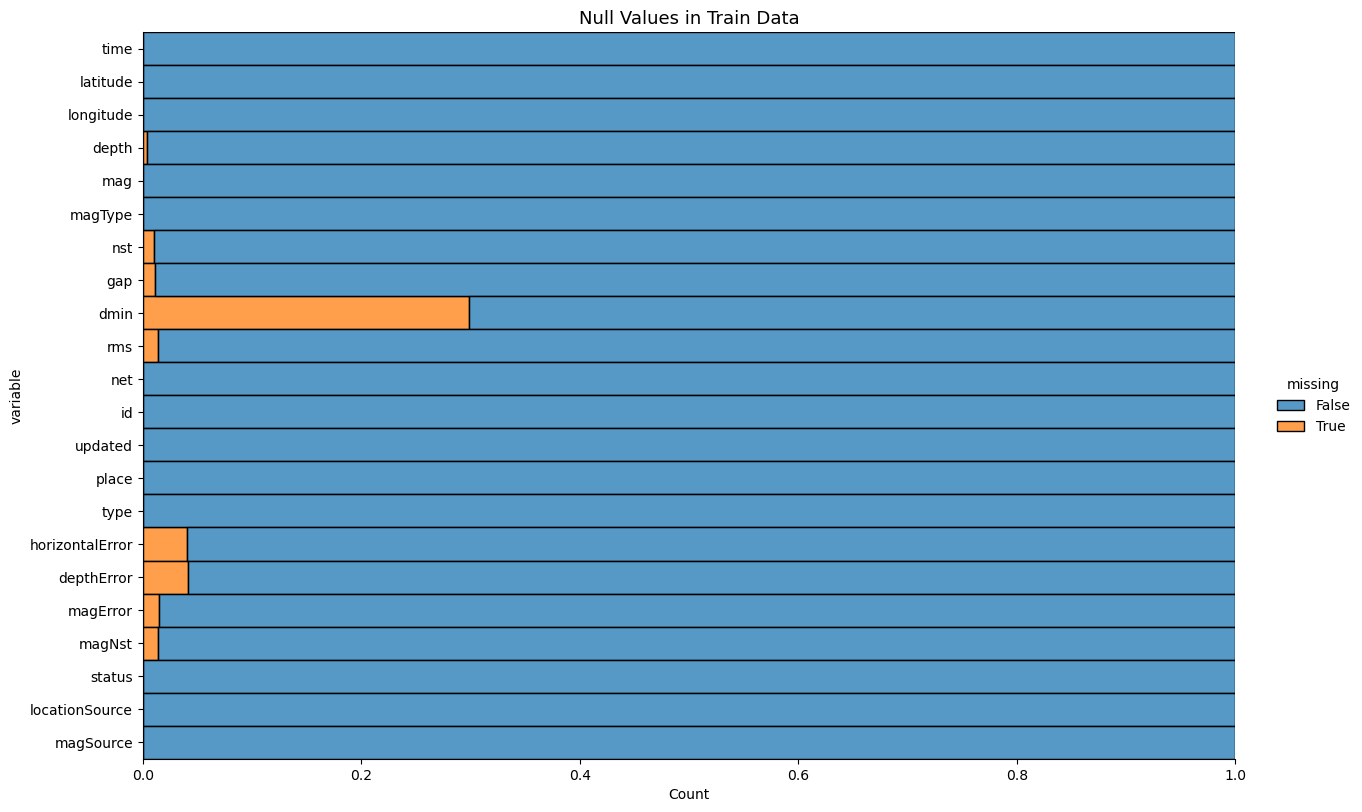

In [8]:
# Graph the missing values as a percentage
sns.displot(data=wa_earthquake_data.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
#     width=10,
    aspect=1.6
)

# specifying a threshold value
#plt.axvline(0.4, color='r')
plt.title('Null Values in Train Data', fontsize=13)
plt.show()

### 2.2 Adding Columns

In [9]:
# View how dates and times are currently formatted
wa_earthquake_data['time'].head(1)

0    1904-03-17T04:20:00.000Z
Name: time, dtype: object

In [10]:
# Convert 'time' column to datetime type
wa_earthquake_data['datetime'] = pd.to_datetime(wa_earthquake_data['time'])

# Format 'datetime' column as a string in the desired format
wa_earthquake_data['datetime'] = wa_earthquake_data['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Now, 'datetime' column will have datetime as string in the format: yyyy-mm-dd hh:mm:ss

In [11]:
# View how 'place' column are currently formatted
wa_earthquake_data['place'].head(1)

0    13 km W of Anacortes, Washington
Name: place, dtype: object

In [12]:
# We need will create a new column for our analysis that lists just the city that was 
# nearest to the earthquake in our dataset. We will use a regular expression with 
# str.extract to capture the city name
# The pattern looks for any characters following 'of ' and stops at the next comma
wa_earthquake_data['city'] = wa_earthquake_data['place'].str.extract('of (.+?),')

In [13]:
wa_earthquake_data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,datetime,city
0,1904-03-17T04:20:00.000Z,48.5,-122.8,NaN,5.3,ml,NaN,NaN,NaN,NaN,ushis,ushis425,2018-06-04T20:43:44.000Z,"13 km W of Anacortes, Washington",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,nqt,1904-03-17 04:20:00,Anacortes
1,1909-01-11T23:44:00.000Z,49.0,-122.7,NaN,6.0,ml,NaN,NaN,NaN,NaN,ushis,ushis480,2018-06-04T20:43:44.000Z,"3 km ENE of Blaine, Washington",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,nqt,1909-01-11 23:44:00,Blaine
2,1915-08-18T14:04:00.000Z,48.5,-121.4,NaN,5.6,ml,NaN,NaN,NaN,NaN,ushis,ushis575,2018-06-04T20:43:44.000Z,"4 km SE of Marblemount, Washington",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,nqt,1915-08-18 14:04:00,Marblemount
3,1920-01-24T07:09:16.000Z,48.8,-123.0,NaN,5.5,ml,NaN,NaN,NaN,NaN,ushis,ushis657,2018-06-04T20:43:44.000Z,"21 km SSE of Point Roberts, Washington",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,nqt,1920-01-24 07:09:16,Point Roberts
4,1931-12-31T15:25:00.000Z,47.5,-123.0,NaN,4.8,ml,NaN,NaN,NaN,NaN,ushis,ushis886,2018-06-04T20:43:44.000Z,"Olympic Peninsula, Washington",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sc,1931-12-31 15:25:00,NaN


### 2.3 Univariate Analysis

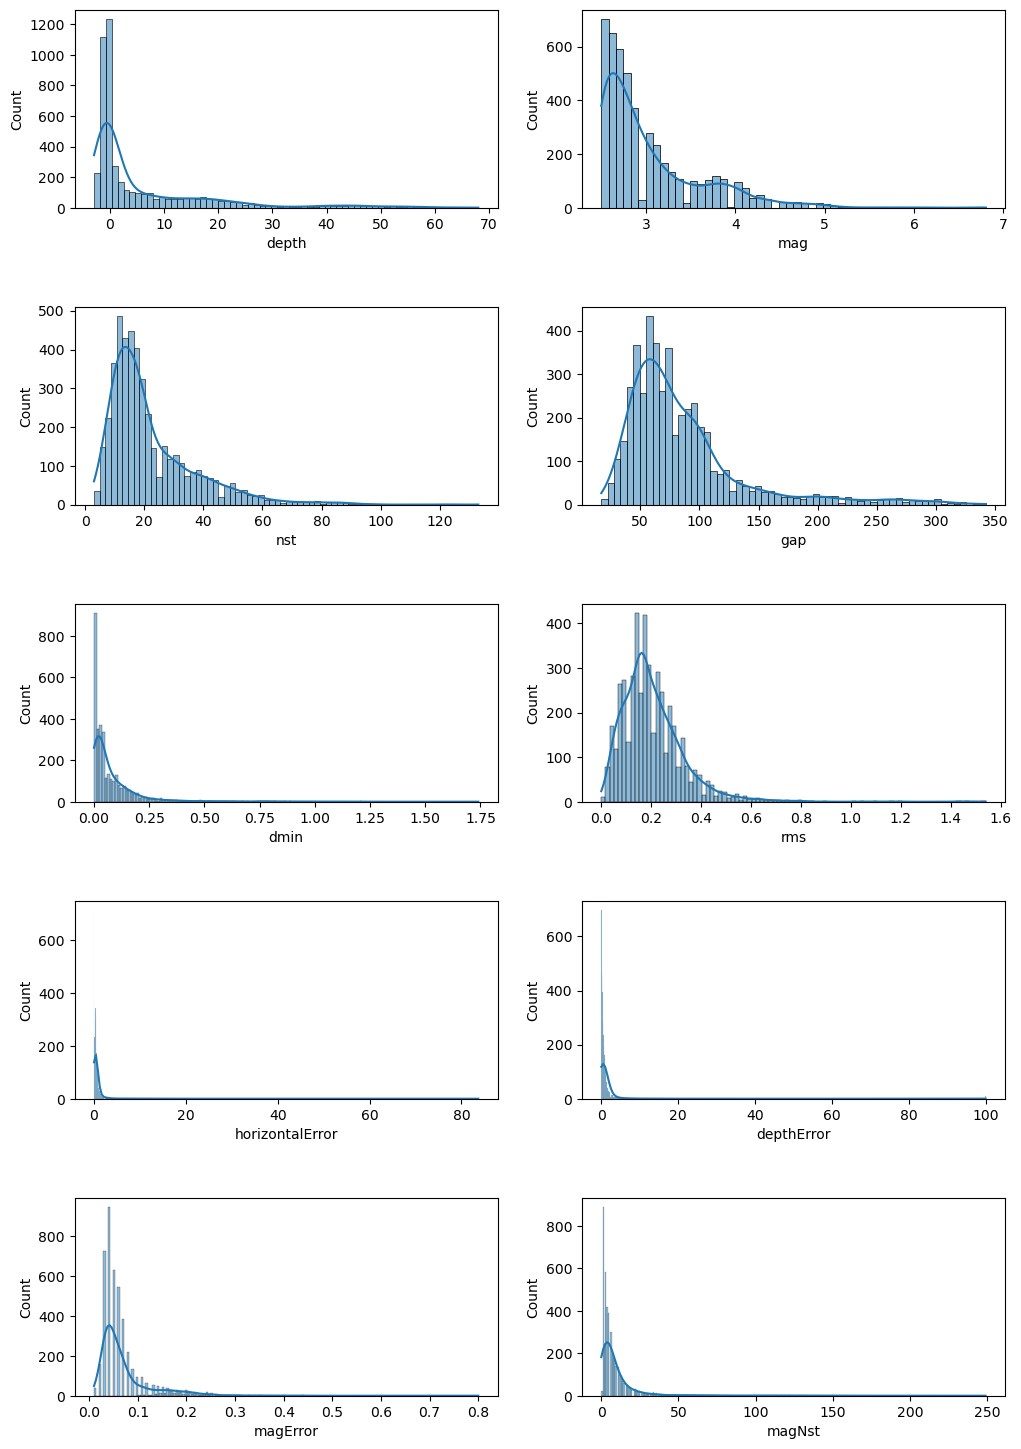

In [14]:
# We will plot out the columns of interest to get a better picture of the distribution of the data
fig = plt.figure(figsize=(12,18))

cols = ['depth', 'mag', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst']

i = 1
for col in cols:
    plt.subplot(5, 2, i)
    sns.histplot(data=wa_earthquake_data, x=col, kde=True)
    i += 1

plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()

### 2.4 Multivariate Analysis

In [15]:
# We need to work with just the numeric columns for our analysis
wa_eq_numeric = wa_earthquake_data.drop(['time', 'magType', 'net', 'id', 'updated', 'place', 'type', 'status', 'locationSource', 'magSource', 'datetime', 'city'], axis=1)
wa_eq_numeric.head(1)

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
0,48.5,-122.8,NaN,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


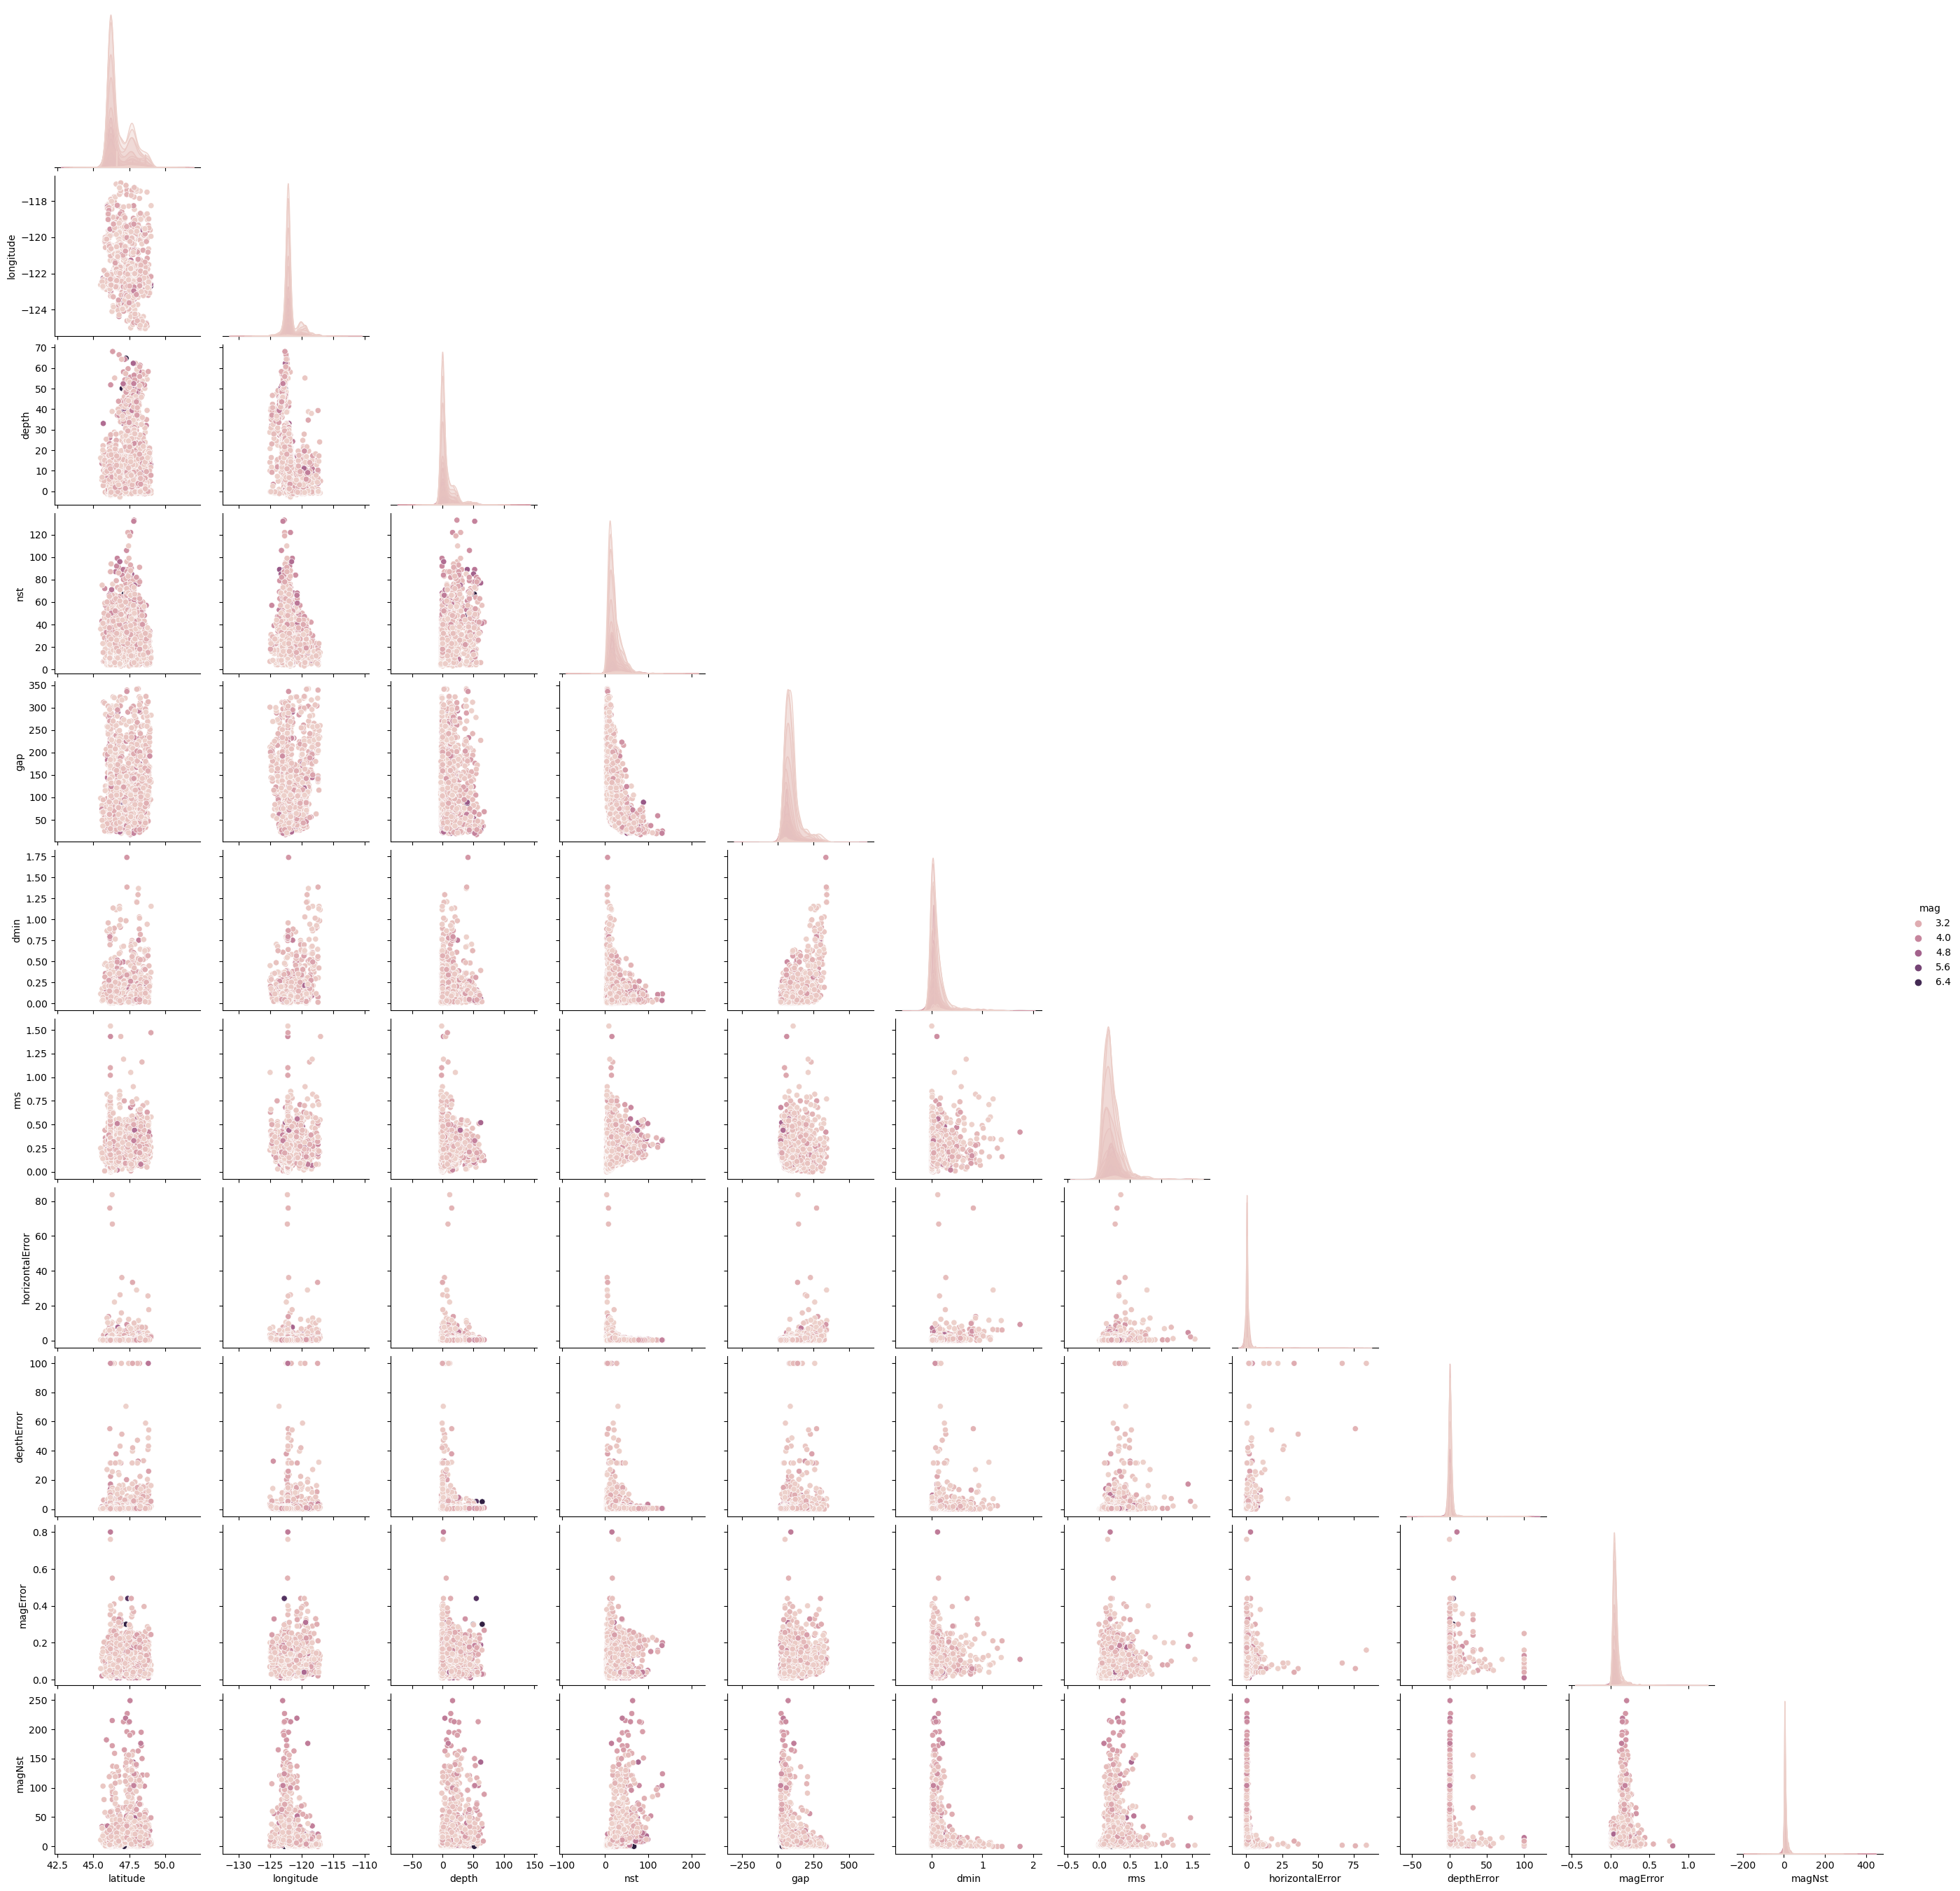

In [16]:
# Plot out our multivariate analysis
multi_analysis = wa_earthquake_data.copy()
sns.pairplot(multi_analysis, hue="mag", corner=True)

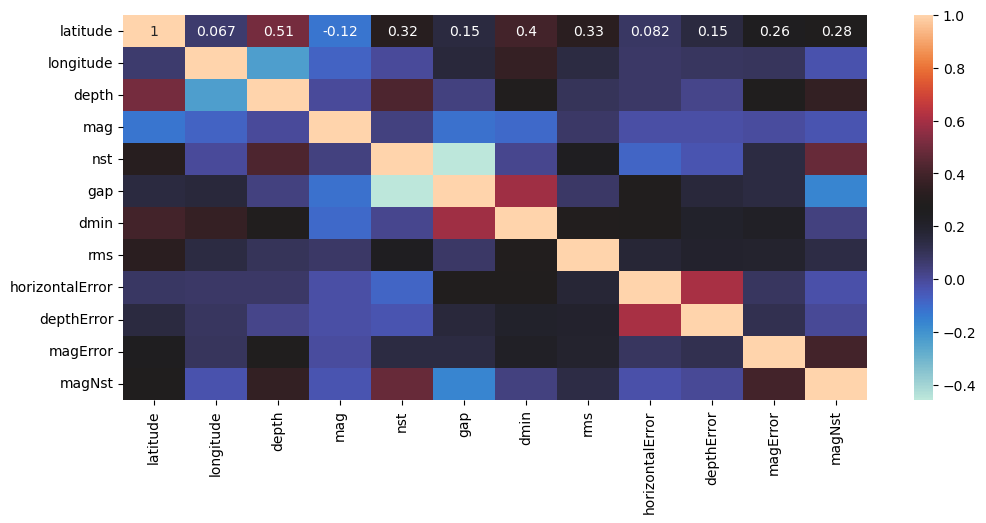

In [17]:
# Heatmap plot of our numeric data
fig, ax = plt.subplots(1, figsize=(12,5))

sns.heatmap(wa_eq_numeric.corr(), annot=True, ax=ax, cmap='icefire')
plt.show()

## 3. Temporal analysis

### 3.1 Cities with more than 20 earthquakes 

In [18]:
# Create a filter of cities that have had more than 20 earthquakes 
city_counts = wa_earthquake_data['city'].value_counts()
cities_to_plot = city_counts[city_counts > 20]

In [19]:
# Find the earthquake that goes the furthest back in our historical records
wa_earthquake_data['datetime'].min()

'1904-03-17 04:20:00'

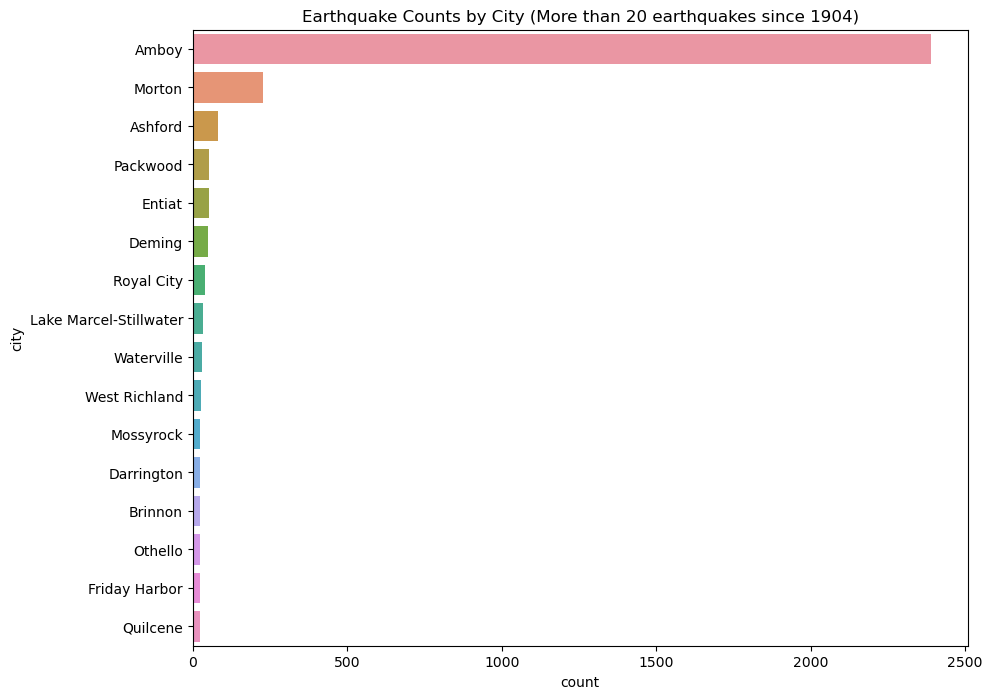

In [20]:
# Now plot using only cities that have had 20+ earthquakes
fig, ax = plt.subplots(1, figsize=(10,8))
sns.countplot(data=wa_earthquake_data[wa_earthquake_data['city'].isin(cities_to_plot.index)], y='city', ax=ax, order=cities_to_plot.index)
plt.title('Earthquake Counts by City (More than 20 earthquakes since 1904)')
plt.show()

In [21]:
# Aggregating earthquake counts and average coordinates per city
city_data = wa_earthquake_data.groupby('city').filter(lambda x: len(x) > 20)
avg_coords = city_data.groupby('city').agg({'latitude':'mean', 'longitude':'mean', 'mag':'count'}).reset_index()
avg_coords.rename(columns={'mag': 'earthquake_count'}, inplace=True)

# Filtering cities with more than 20 earthquakes
cities_over_20_earthquakes = avg_coords[avg_coords['earthquake_count'] > 20]

# Creating a map centered around Washington
wa_map_20 = folium.Map(location=[47.3511, -120.7401], zoom_start=7)

# Define the HTML content for the title
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Washington Cities with more than 20 Earthquakes</b></h3>
             '''

# Add the title to the map using a Html object and add it to a Marker, which is then added to the map
wa_map_20.get_root().html.add_child(folium.Element(title_html))



# Adding markers for each city
for idx, row in cities_over_20_earthquakes.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['city']}: {row['earthquake_count']} earthquakes",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(wa_map_20)

# Save the map to an HTML file
wa_map_20.save('/Users/adamrivardwalter/Data Science/Machine Learning/ML Projects/Earthquake Prediction/wa_cities_earthquakes_>_20.html')    
    
# Displaying the map
#wa_map_20

#### test

<iframe src="https://raw.githubusercontent.com/adamw80/WA-State-Earthquake-Analysis-and-Prediction/main/Folium%20Images/wa_cities_earthquakes_%3E_20.html" width="100%" height="600"></iframe>

# Washington Cities with More Than 20 Earthquakes redo

<iframe src="https://adamw80.github.io/WA-State-Earthquake-Analysis-and-Prediction/Folium%20Images/wa_cities_earthquakes_%3E_20.html" width="100%" height="600"></iframe>


#### Washington Cities with More Than 20 Earthquakes

### Washington Cities with More Than 20 Earthquakes

<iframe src="https://github.com/adamw80/WA-State-Earthquake-Analysis-and-Prediction/blob/main/Folium%20Images/wa_cities_earthquakes_%3E_20.html" width="100%" height="600"></iframe>


### 3.2 Cities with Lowest and Highest frequencies of earthquakes

In [22]:
error

NameError: name 'error' is not defined

In [ ]:
# Ensure the 'time' column is in datetime format
wa_earthquake_data['time'] = pd.to_datetime(wa_earthquake_data['time'])

# Sort the DataFrame by city and time to ensure the time differences make sense
wa_earthquake_data.sort_values(by=['city', 'time'], inplace=True)

# Calculate the time difference between consecutive earthquakes in the same city
wa_earthquake_data['time_diff'] = wa_earthquake_data.groupby('city')['time'].diff().dt.total_seconds()

# Convert seconds to a more readable format (e.g., days) if necessary
wa_earthquake_data['time_diff_days'] = wa_earthquake_data['time_diff'] / (60 * 60 * 24)

In [ ]:
# Calculate the average time difference (frequency) for each city
city_freq = wa_earthquake_data.groupby('city')['time_diff_days'].mean().reset_index()

In [ ]:
# Sort the cities by frequency and select the top 50 for both highest and lowest frequencies
top_50_highest_freq = city_freq.sort_values(by='time_diff_days', ascending=True).head(50)
top_50_lowest_freq = city_freq.sort_values(by='time_diff_days', ascending=False).head(50)

In [ ]:
# Visualization for the top 50 cities with the highest frequency of earthquakes
plt.figure(figsize=(14, 8))
sns.barplot(x='time_diff_days', y='city', data=top_50_highest_freq, palette='inferno')
plt.title('Top 50 Cities with the Highest Frequency of Earthquakes')
plt.xlabel('Average Time Between Earthquakes (days)')
plt.ylabel('City')
plt.tight_layout()
plt.show()

# Visualization for the top 50 cities with the lowest frequency of earthquakes
plt.figure(figsize=(12, 8))
sns.barplot(x='time_diff_days', y='city', data=top_50_lowest_freq, palette='viridis')
plt.title('Top 50 Cities with the Lowest Frequency of Earthquakes')
plt.xlabel('Average Time Between Earthquakes (days)')
plt.ylabel('City')
plt.tight_layout()
plt.show()

In [ ]:
# Averaging latitude and longitude to represent each earthquake's location
city_coords = wa_earthquake_data.groupby('city').agg({
    'latitude': 'mean',
    'longitude': 'mean'
}).reset_index()

In [ ]:
# Merge to add coordinates to frequency data
top_50_highest_freq = top_50_highest_freq.merge(city_coords, on='city', how='left')
top_50_lowest_freq = top_50_lowest_freq.merge(city_coords, on='city', how='left')

In [ ]:
# Initialize a map centered around Washington State
wa_map6 = folium.Map(location=[47.2511, -120.9401], zoom_start=7)


# Define the HTML content for the title
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Washington Cities with the Highest & Lowest Earthquake Frequencies</b></h3>
             '''

# Add the title to the map using a Html object and add it to a Marker, which is then added to the map
wa_map6.get_root().html.add_child(folium.Element(title_html))


# Layer for the top 50 cities with the highest frequency of earthquakes
highest_freq_layer = folium.FeatureGroup(name='Top 50 Highest Frequency')
for _, row in top_50_highest_freq.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"{row['city']}: {row['time_diff_days']} days"
    ).add_to(highest_freq_layer)

# Layer for the top 50 cities with the lowest frequency of earthquakes
lowest_freq_layer = folium.FeatureGroup(name='Top 50 Lowest Frequency')
for _, row in top_50_lowest_freq.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['city']}: {row['time_diff_days']} days"
    ).add_to(lowest_freq_layer)

# Add layers to the map
wa_map6.add_child(highest_freq_layer)
wa_map6.add_child(lowest_freq_layer)

# Add LayerControl to toggle layers
wa_map6.add_child(folium.LayerControl())

# Save the map to an HTML file
wa_map6.save('/Users/adamrivardwalter/Data Science/Machine Learning/ML Projects/Earthquake Prediction/wa_cities_earthquakes_highest_freq.html')    

# Display the map
wa_map6

### 3.3 Earthquake Frequency and Magnitude Over Time

In [ ]:
# convert 'datetime' to type datetime64
wa_earthquake_data['datetime'] = pd.to_datetime(wa_earthquake_data['datetime'])

# Earthquake Frequency and Magnitude Over Time
# Group data by year for frequency and magnitude trends
wa_earthquake_data['year'] = wa_earthquake_data['datetime'].dt.year
yearly_counts = wa_earthquake_data.groupby('year').size()
yearly_magnitude_avg = wa_earthquake_data.groupby('year')['mag'].mean()

In [ ]:
# Plotting Trends Over Time
fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Frequency', color=color)
ax1.plot(yearly_counts.index, yearly_counts.values, color=color, label='Earthquake Frequency')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Avg Magnitude', color=color)  # we already handled the x-label with ax1
ax2.plot(yearly_magnitude_avg.index, yearly_magnitude_avg.values, color=color, label='Average Magnitude')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Earthquake Frequency and Average Magnitude Over Time')
plt.show()

### 3.4 Time of Day/Year Analysis

In [ ]:
# Time of Day/Year Analysis
# Distribution Across Time of Day
wa_earthquake_data['hour'] = wa_earthquake_data['datetime'].dt.hour
hourly_counts = wa_earthquake_data.groupby('hour').size()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title('Distribution of Earthquakes Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

# Distribution Across Months of the Year
wa_earthquake_data['month'] = wa_earthquake_data['datetime'].dt.month
monthly_counts = wa_earthquake_data.groupby('month').size()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title('Distribution of Earthquakes Across Months of the Year')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Convert 'datetime' to datetime format
wa_earthquake_data['datetime'] = pd.to_datetime(wa_earthquake_data['datetime'])

# Group by the year extracted from the 'datetime' column
year_quakes = wa_earthquake_data.groupby(wa_earthquake_data['datetime'].dt.year).size()

# Calculate the ten-year moving average
tenyear_MA = year_quakes.rolling(10).mean()

In [ ]:
# Number of earthquakes each year in dataset
year_quakes = wa_earthquake_data.groupby(wa_earthquake_data['datetime'].dt.year).size()

# Calculate the ten-year moving average
tenyear_MA = year_quakes.rolling(10).mean()

# Generate time series lineplot
fig, ax = plt.subplots(1, figsize=(12,5))
sns.lineplot(ax=ax, x=year_quakes.index, y=year_quakes.values, label='Annual earthquakes')
sns.lineplot(ax=ax, x=year_quakes.index, y=tenyear_MA, label='Ten-year moving average')
ax.set_title('Earthquakes per year')
ax.set(xlabel='Year', ylabel='Recorded earthquakes')
ax.grid(True)
plt.show()

In [ ]:
# Monthly trends in earthquakes
month_quakes = wa_earthquake_data.groupby(wa_earthquake_data['datetime'].dt.month).size()

fig, ax = plt.subplots(1, figsize=(12,4))
sns.lineplot(ax=ax, x=month_quakes.index, y=month_quakes.values)
ax.set_title('Cumulative earthquakes per month')
ax.set(xlabel='Month', ylabel='Recorded Earthquakes')
plt.xticks(ticks=range(1, 13))
ax.grid(True)
plt.show()

## 4. Spatial analysis

### 4.1 View Earthquakes Locations

In [ ]:
# Load the Fault Line Shapefile
shapefile_path = '/Users/adamrivardwalter/Data for Processing/Preprocessing/Classification/Earthquake Prediction/WA_Qfault_2020_Update_Shapefile/WA_Qfault_update_DataRelease.shp'
fault_lines = gpd.read_file(shapefile_path)

# Check the data
print(fault_lines.head())

In [ ]:
# Coordinates for the center of Washington State
latitude = 47.3511
longitude = -120.7401

# Create a map centered around Washington State
wa_map_base = folium.Map(location=[latitude, longitude], zoom_start=7)


# Define the HTML content for the title
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Washington Earthquakes And Fault Lines</b></h3>
             '''

# Add the title to the map using a Html object and add it to a Marker, which is then added to the map
wa_map_base.get_root().html.add_child(folium.Element(title_html))


# Display the map
#wa_map_base

In [ ]:
# Locations of earthquakes in the dataset with radius = magnitude * 2000
# go through each quake in set, make circle, and add to map.
for i in range(len(wa_earthquake_data)):
    if wa_earthquake_data.iloc[i]['mag'] > 3:
        folium.Circle(
            location=[wa_earthquake_data.iloc[i]['latitude'], wa_earthquake_data.iloc[i]['longitude']],
            radius=wa_earthquake_data.iloc[i]['mag'] * 2000,
            weight=1,  # thickness of the border
            color='red',  # this is the color of the border
            opacity=0.3,  # this is the alpha for the border
            fill_color='red',  # fill is inside the circle
            fill_opacity=0.1,  # we will make that less opaque so we can see layers

        ).add_to(wa_map_base)

# Save the map to an HTML file
wa_map_base.save('/Users/adamrivardwalter/Data Science/Machine Learning/ML Projects/Earthquake Prediction/wa_earthquakes.html')    

wa_map_base

### 4.2 Fault Lines

In [ ]:
# Adding WA fault lines to our basemap
# Convert the Shapefile to GeoJSON
fault_lines_geojson = fault_lines.to_json()

# Add the GeoJSON layer to the map
folium.GeoJson(fault_lines_geojson, name='Fault Lines').add_to(wa_map_base)


# Add layer control
folium.LayerControl().add_to(wa_map_base)

# Save the map to an HTML file
wa_map_base.save('/Users/adamrivardwalter/Data Science/Machine Learning/ML Projects/Earthquake Prediction/wa_earthquakes_with_faultlines.html')    


# Display the map
wa_map_base

## 5. Target Variable Analysis

### 5.1 Cities that experienced the largest Magnitude Earthquakes

In [ ]:
# Finding the largest magnitude earthquake for each city
largest_mag_per_city = wa_earthquake_data.groupby('city')['mag'].max().sort_values(ascending=False).head(50)

In [ ]:
# Plotting
plt.figure(figsize=(10, 10))
sns.barplot(x=largest_mag_per_city.values, y=largest_mag_per_city.index, palette='inferno')
plt.title('Top 50 Cities with the Largest Magnitude Earthquakes in Washington')
plt.xlabel('Magnitude')
plt.ylabel('City')
plt.grid(axis='x')

plt.show()

In [ ]:
# Filtering the dataset for earthquakes with magnitude over 4.5
earthquakes_over_4_5 = wa_earthquake_data[wa_earthquake_data['mag'] > 4.5]

# Aggregating average coordinates for cities with earthquakes over magnitude 4.5
cities_over_4_5_mag = earthquakes_over_4_5.groupby('city').agg({'latitude':'mean', 'longitude':'mean'}).reset_index()

In [ ]:
# Creating a new map centered around Washington for these specific cities
wa_map_over_4_5 = folium.Map(location=[47.3511, -120.7401], zoom_start=7)

# Define the HTML content for the title
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Washington Earthquakes Over 4.5 Magnitude</b></h3>
             '''

# Add the title to the map using a Html object and add it to a Marker, which is then added to the map
wa_map_over_4_5.get_root().html.add_child(folium.Element(title_html))



# Adding markers for each city
for idx, row in cities_over_4_5_mag.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['city']}: Earthquakes over magnitude 4.5",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(wa_map_over_4_5)

# Save the map to an HTML file
wa_map_over_4_5.save('/Users/adamrivardwalter/Data Science/Machine Learning/ML Projects/Earthquake Prediction/wa_cities_earthquakes_>_4.html')    


wa_map_over_4_5

### 5.2 Depth Analysis: Correlation Between Earthquake Depth and Magnitude

In [ ]:
plt.figure(figsize=(10, 10))
# Swap 'x' and 'y' parameters to place 'depth' on the vertical axis and 'mag' on the horizontal axis
sns.scatterplot(x='mag', y='depth', data=wa_earthquake_data)
plt.title('Magnitude vs Depth of Earthquakes')
plt.ylabel('Depth (km)')
plt.xlabel('Magnitude')
# Invert the y-axis to have zero at the top and increasing depth as it goes down
plt.ylim(max(wa_earthquake_data['depth']), 0)
plt.show()

# Correlation Coefficient
depth_magnitude_corr = wa_earthquake_data['depth'].corr(wa_earthquake_data['mag'])
print(f"Correlation coefficient between depth and magnitude: {depth_magnitude_corr:.2f}")


### 5.3 Spatial Clustering

The spatial clustering analysis of the earthquake data has been completed using DBSCAN, a density-based clustering algorithm. The clusters represent areas with high seismic activity based on the proximity of earthquake events.

In [ ]:
latitude = 47.3511
longitude = -120.7401

coords = wa_earthquake_data[['latitude', 'longitude']].values

# DBSCAN clustering
# eps is the maximum distance between two samples for one to be considered as in the neighborhood of the other. 
# min_samples is the number of samples in a neighborhood for a point to be considered as a core point.
dbscan = DBSCAN(eps=0.1, min_samples=10, algorithm='auto', metric='haversine').fit(np.radians(coords))

# Assigning cluster labels to the original data
wa_earthquake_data['cluster'] = dbscan.labels_

# Filtering out noise (-1 label)
clustered_data = wa_earthquake_data[wa_earthquake_data['cluster'] != -1]

# Creating a map to visualize the clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)


# Define the HTML content for the title
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Washington Earthquake Spatial Clustering</b></h3>
             '''

# Add the title to the map using a Html object and add it to a Marker, which is then added to the map
map_clusters.get_root().html.add_child(folium.Element(title_html))


# Adding markers for the clusters using different colors
for cluster in clustered_data['cluster'].unique():
    cluster_data = clustered_data[clustered_data['cluster'] == cluster]
    for idx, row in cluster_data.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=2,
            color=plt.cm.nipy_spectral(cluster / len(set(dbscan.labels_))),
            fill=True,
            fill_color=plt.cm.nipy_spectral(cluster / len(set(dbscan.labels_))),
            fill_opacity=0.5
        ).add_to(map_clusters)

# Save the map to an HTML file
map_clusters.save('/Users/adamrivardwalter/Data Science/Machine Learning/ML Projects/Earthquake Prediction/wa_earthquakes_spatial_clustering.html')    

map_clusters

## 6. Statistical Methods

### 6.1 Moran's I

In [ ]:
# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(
    wa_earthquake_data, 
    geometry=gpd.points_from_xy(wa_earthquake_data.longitude, wa_earthquake_data.latitude))

In [ ]:
# gdf is our GeoDataFrame and already has a 'geometry' column of Points
# Extract latitude and longitude from the Point geometry
latitudes = gdf.geometry.y
longitudes = gdf.geometry.x

# Stack latitudes and longitudes into an array of shape (n,2) where n is the number of points
coords = np.column_stack((latitudes, longitudes))

# Now, use this coords array for DistanceBand
weights = DistanceBand(coords, threshold=100000, binary=True, silence_warnings=True)

In [ ]:
# Calculate our Moran's value with p-value
morans_I = Moran(gdf['mag'], weights)
print(f"Moran's I: {morans_I.I}, p-value: {morans_I.p_sim}")

- **Moran's I value:** -0.0002211
- **P-value:** 0.001

### Interpreting Moran's I
Moran's I values range from -1 to 1, where:
- A value close to +1 indicates a strong positive spatial autocorrelation, meaning that features (in this case, earthquake magnitudes) are similar to their neighbors (e.g., high magnitudes are near high magnitudes).
- A value close to -1 indicates a strong negative spatial autocorrelation, suggesting that features are dissimilar to their neighbors (e.g., high magnitudes are near low magnitudes).
- A value around 0 suggests a random spatial pattern.

### Interpretation of Our Results
- The Moran's I value of approximately 0 (-0.0002211) suggests that the spatial distribution of earthquake magnitudes in our dataset is close to random, indicating no strong pattern of spatial autocorrelation at the scale or within the  distance analyzed.
- The very low p-value (0.001) suggests that the observed spatial pattern (or lack thereof) is statistically significant, meaning there's a low probability that this pattern occurred by chance.

### Implications
- The lack of significant positive or negative spatial autocorrelation in earthquake magnitudes suggests that the magnitude of an earthquake at a given location does not strongly predict the magnitude of earthquakes at nearby locations, within the context of the spatial scale and thresholds used.
- The significant p-value indicates confidence in this finding, suggesting that the spatial distribution of magnitudes is not clustered but rather dispersed or random.


### 6.2 Poisson Model

In [ ]:
# Calculate frequencies for magnitude ranges
magnitude_ranges = [(2.0, 2.9), (3.0, 3.9), (4.0, 4.9), (5.0, 5.9), (6.0, 6.9)]
magnitude_counts = {}

# Calculate the total observation period in years
total_years = wa_earthquake_data['year'].max() - wa_earthquake_data['year'].min() + 1

for min_mag, max_mag in magnitude_ranges:
    # Filter earthquakes within the magnitude range
    filtered_data = wa_earthquake_data[(wa_earthquake_data['mag'] >= min_mag) & (wa_earthquake_data['mag'] <= max_mag)]
    # Count the number of earthquakes and normalize by the observation period to get an annual rate
    annual_rate = round(len(filtered_data) / total_years,2)
    magnitude_counts[f'{min_mag}-{max_mag}'] = annual_rate

magnitude_counts

Based on the historical earthquake data for Washington State, the annual rates of earthquakes within various magnitude ranges are estimated as follows:

- **Magnitude 2.0-2.9:** Approximately 23.27 earthquakes per year
- **Magnitude 3.0-3.9:** Approximately 11.99 earthquakes per year
- **Magnitude 4.0-4.9:** Approximately 3.16 earthquakes per year
- **Magnitude 5.0-5.9:** Approximately 0.24 earthquakes per year
- **Magnitude 6.0-6.9:** Approximately 0.04 earthquakes per year


### Probability Estimation using Poisson Distribution:
To estimate the probability of at least one earthquake occurring within a specific magnitude range in a given year, we can use the Poisson distribution formula, given the annual rate ($\lambda)\$ of earthquakes for that magnitude range:

$P(X \geq 1) = 1 - P(X = 0) = 1 - e^{-\lambda} $

Where:
- $P(X \geq 1)$ is the probability of at least one earthquake occurring within the specified magnitude range in a year.
- $P(X = 0)$ is the probability of no earthquakes occurring within the specified magnitude range in a year, which is calculated using the Poisson probability mass function with $\lambda$ (the annual rate) and $X = 0$.
- $e$ is the base of the natural logarithm (approximately 2.71828).


In [ ]:
# Probability estimation using the Poisson distribution for at least one earthquake
probability_at_least_one = {magnitude_range: 1 - np.exp(-annual_rate) for magnitude_range, annual_rate in magnitude_counts.items()}

probability_at_least_one

The probability estimations for at least one earthquake occurring within a given year, for various magnitude ranges in Washington State, using the Poisson distribution are as follows:

- **Magnitude 2.0-2.9:** The probability is approximately 99.999999997%.
- **Magnitude 3.0-3.9:** The probability is approximately 99.99958%.
- **Magnitude 4.0-4.9:** The probability is approximately 95.98%.
- **Magnitude 5.0-5.9:** The probability is approximately 22.60%.
- **Magnitude 6.0-6.9:** The probability is approximately 4.05%.

These probabilities indicate the likelihood of experiencing at least one earthquake within the specified magnitude ranges in any given year across Washington State, based on historical data. The results show a high probability of smaller magnitude earthquakes (2.0-4.9) occurring annually, with significantly lower probabilities for larger magnitude earthquakes (5.0 and above).


In [ ]:
# Graph the Poisson Distribution
fig, ax = plt.subplots(figsize=(10, 6))
magnitude_ranges_str = [f'{min_mag}-{max_mag}' for min_mag, max_mag in magnitude_ranges]
probabilities = list(probability_at_least_one.values())

# Plot for each magnitude range
for i, magnitude_range in enumerate(magnitude_ranges_str):
    mu = magnitude_counts[magnitude_range] # Annual rate as mean (λ) for Poisson distribution
    # Generate Poisson distribution for range of k values (number of events)
    k_values = np.arange(0, max(10, int(mu)*2))
    poisson_prob = poisson.pmf(k_values, mu)
    ax.plot(k_values, poisson_prob, marker='o', linestyle='-', label=magnitude_range)

ax.set_title('Poisson Distribution of Earthquake Probabilities by Magnitude Range')
ax.set_xlabel('Number of Earthquakes in a Year')
ax.set_ylabel('Probability')
ax.legend(title='Magnitude Range')
plt.grid(True)
plt.show()

## 7. Machine Learning Regressive Models

### 7.1 Model Prep

In [ ]:
# Drop nan from the 'depth' column for classifier analysis
wa_earthquake_data.dropna(subset=['depth'] ,inplace=True)

In [ ]:
# Define features
X = wa_earthquake_data[['latitude', 'longitude', 'depth', 'year']]
y = wa_earthquake_data['mag']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 7.2 MLPRegressor()

In [ ]:
# Initialize the MLPRegressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(200,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the model
mlp_regressor.fit(X_train, y_train)

# Make predictions
y_pred = mlp_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MLPRegressor: Mean Absolute Error (MAE): {mae}\n")
print(f"MLPRegressor: Root Mean Squared Error (RMSE): {rmse}")

### 7.3 Average Ensemble

In [ ]:
# Define models
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

# Create average ensemble
avg = VotingRegressor(estimators=[('lr', lr), ('dt', dt), ('knn', knn)])

# Fit ensemble on data
avg.fit(X_train, y_train)

# Make predictions
y_pred = avg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Average Ensemble: Mean Absolute Error (MAE): {mae}\n")
print(f"Average Ensemble: Root Mean Squared Error (RMSE): {rmse}")

### 7.4 BOOSTING - AdaBoost

In [ ]:
# Define base model
dt = DecisionTreeRegressor()

# Create boosting ensemble
boost = AdaBoostRegressor(base_estimator=dt, n_estimators=10)

# Fit ensemble on data
boost.fit(X_train, y_train)

# Make predictions
y_pred = boost.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"AdaBoost: Mean Absolute Error (MAE): {mae}\n")
print(f"AdaBoost: Root Mean Squared Error (RMSE): {rmse}")

### 7.5 TensorFlow

In [ ]:
import tensorflow as tf
from kerastuner import RandomSearch

def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(
        units=hp.Int('units', min_value=32, max_value=512, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)))
    model.add(tf.keras.layers.Dense(
        units=hp.Int('units', min_value=32, max_value=512, step=32),
        activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='mean_squared_error')
    
    return model

In [ ]:
# Hyperparameter Tuning
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,  # Number of different configurations to try
    executions_per_trial=1,  # Number of models to build and fit for each trial
    directory='my_dir',  # Directory to save logs and models
    project_name='earthquake_magnitude_prediction')

# Search for the best hyperparameter configuration
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, verbose=0)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred)).numpy()
rmse = tf.sqrt(tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))).numpy()

print(f"TensorFlow: Mean Absolute Error (MAE): {mae}\n")
print(f"TensorFlow: Root Mean Squared Error (RMSE): {rmse}")

### 7.6 Regressor Model Analysis

- The **Average Ensemble** model outperforms the others in both MAE and RMSE, making it the best model among those listed. Its performance suggests that it not only makes predictions close to the actual values on average but also handles large errors better than the other models.
- **AdaBoost** follows closely behind, with slightly higher errors in both metrics compared to the Average Ensemble. It's a strong model, especially considering its simplicity and the adaptive nature of boosting techniques.
- **TensorFlow** sits in the middle of the pack. While it doesn't perform as well as the Average Ensemble or AdaBoost, it still shows decent predictive capabilities.
- The **MLPRegressor** has the highest errors in both metrics, suggesting it may not be as well-tuned or suitable for the data as the other models. Its performance could potentially be improved with further hyperparameter tuning or data preprocessing.


## 8. Machine Learning Classifier Models

### 8.1 Model Prep

*Note*: For our prediction target (label), we will classify earthquakes based on a magnitude threshold (e.g., whether an earthquake is above magnitude 4.0). This involves creating a binary label: 1 for earthquakes above the threshold and 0 for those below.

In [ ]:
# Define the prediction target: 1 if magnitude >= 4.0, else 0
wa_earthquake_data['target'] = (wa_earthquake_data['mag'] >= 4.0).astype(int)

In [ ]:
# Percent of target:0 and target:1
wa_earthquake_data['target'].value_counts(normalize=True)

In [ ]:
# Define features and target
X = wa_earthquake_data[['latitude', 'longitude', 'depth', 'year']]
y = wa_earthquake_data['target']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 8.2 RandomForestClassifier()

In [ ]:
# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

#print(accuracy) 
#print(report)

# Evaluate the performance of the model on the testing data
print(f"Accuracy of the RandomForestClassifier: {model.score(X_test, y_test)*100} %\n")
print(report)

### 8.3 MLPClassifier()

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Configuring and training the MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_clf.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = mlp_clf.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Evaluate the performance of the model on the testing data
print(f"Accuracy of the MLPClassifier: {mlp_clf.score(X_test, y_test)*100} %\n")
print(report)

### 8.4 Majority Ensemble

In [ ]:
# Define three different models
model1 = LogisticRegression(random_state=42)
model2 = DecisionTreeClassifier(random_state=42)
model3 = SVC(random_state=42, probability=True)

# Combine the models using majority voting
ensemble = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('svc', model3)], voting='hard')

# Fit the ensemble on the training data
ensemble.fit(X_train, y_train)

# Evaluate the performance of the ensemble on the testing data
print(f"Accuracy of the Majority Ensemble: {ensemble.score(X_test, y_test)*100} %\n")
print(report)

### 8.5 Stacking Ensemble

In [ ]:
# Define models
lr = LogisticRegression(max_iter=500) # recieved an error to increase the max_iter
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

# Create a stacking ensemble
stack = StackingClassifier(estimators=[('lr', lr), ('dt', dt), ('knn', knn)], final_estimator=LogisticRegression())

# Fit ensemble on data
stack.fit(X, y)

# Evaluate the performance of the ensemble on the testing data
print(f"Accuracy of the Stacking Ensemble: {stack.score(X_test, y_test)*100} %\n")
print(report)

### 8.6 Bagging Ensemble

In [ ]:
# Define base model
dt = DecisionTreeClassifier()

# Create a bagging ensemble
bag = BaggingClassifier(base_estimator=dt, n_estimators=10)

# Fit ensemble on data
bag.fit(X, y)

# Make predictions on the testing data
y_pred = bag.predict(X_test)

# Evaluate the performance of the ensemble on the testing data
accuracy_bag = bag.score(X_test, y_test)*100
print(f"Accuracy of the Bagging Ensemble: {accuracy_bag} %\n")

# Generate a new classification report for the Bagging Ensemble
report_bag = classification_report(y_test, y_pred)
print(report_bag)

### 8.7 Classifier Model Analysis

Summary and analysis of each model based on their scores:

### RandomForestClassifier
- **Accuracy**: 91.31%
- Performs well overall, with good balance in recognizing both classes. However, it has a relatively lower precision and recall with class 1.

### MLPClassifier and Majority Ensemble
- **Accuracy**: 92.01% and 92.23%, respectively
- These models have similar performance, indicating a high accuracy driven primarily by their ability to classify the majority class (0) correctly. However, both models struggle significantly with class 1, having very low recall (0.04), which means they rarely correctly identify class 1 instances.

### Stacking Ensemble
- **Accuracy**: 92.16%
- Similar performance to the MLPClassifier and Majority Ensemble, with a slight improvement in accuracy. Still, it has poor recall for class 1, making it less effective for balanced performance across classes.

### Bagging Ensemble
- **Accuracy**: 98.59%
- Significantly higher accuracy, precision, recall, and f1-score across both classes compared to the other models. This model demonstrates not only the ability to correctly classify the majority of instances but also shows substantial improvement in identifying class 1 instances, with a recall of 0.84 and precision of 0.98 for class 1.

### Best Model: Bagging Ensemble
Given the metrics, the **Bagging Ensemble** is the best model among those listed. It not only provides the highest accuracy but also maintains a high level of precision and recall for both classes, indicating a strong performance on both the majority and minority classes. This balance is particularly important in imbalanced datasets where performance on the minority class can be critical.

While accuracy is a useful metric, it doesn't always provide the full picture, especially in imbalanced datasets where class 1 is much less frequent. The high recall (0.84) for class 1 in the Bagging Ensemble suggests it is much better at identifying positive instances of the minority class without sacrificing precision (0.98), which means it rarely misclassifies negative instances as positive. This makes the Bagging Ensemble more reliable for predicting both classes accurately, making it the superior choice based on the provided data.

## 9. Earthquake Model Predictions and Visualizations

### 9.1 Classification of real earthquake locations to random noise

In [ ]:
# Spatial min and max
min_longitude = wa_earthquake_data['longitude'].min()
max_longitude = wa_earthquake_data['longitude'].max()

min_latitude = wa_earthquake_data['latitude'].min()
max_latitude = wa_earthquake_data['latitude'].max()

min_depth = wa_earthquake_data['depth'].min()
max_depth = wa_earthquake_data['depth'].max()

In [ ]:
# Generate synthetic data (across ranges in our data)
num_samples = len(wa_earthquake_data)
synthetic_data = pd.DataFrame({
    'latitude': np.random.uniform(low=min_latitude, high=max_latitude, size=num_samples),
    'longitude': np.random.uniform(low=min_longitude, high=max_longitude, size=num_samples),
    'depth': np.random.uniform(low=min_depth, high=max_depth, size=num_samples),
    'target': 0  # Label for synthetic data
})

# Add a target column to your real data
wa_earthquake_data['target'] = 1

# Combine the datasets
combined_data = pd.concat([wa_earthquake_data[['latitude', 'longitude', 'depth', 'target']], synthetic_data])

# Split into features and target
X = combined_data[['latitude', 'longitude', 'depth']]
y = combined_data['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")


#### 9.2 Regression Model piped nto Classifier Model to predict probabilities of different magnitudes 

In [ ]:
X = wa_earthquake_data[['latitude', 'longitude', 'depth', 'year', 'hour', 'month']]
y = wa_earthquake_data['mag']

In [ ]:
# Splitting the data (repeating for clarity)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)


In [ ]:
# Scale the entire dataset 'X' using the fitted scaler
X_scaled = scaler.transform(X)

# Initialize and train the regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train_scaled, y_train)

In [ ]:
# Predict magnitudes for the entire dataset
predicted_magnitudes = regressor.predict(X_scaled)  

In [ ]:
def categorize_magnitude(magnitude):
    if magnitude < 3.0: return 'Micro'
    elif magnitude < 4.0: return 'Minor'
    elif magnitude < 5.0: return 'Light'
    elif magnitude < 6.0: return 'Moderate'
    elif magnitude < 7.0: return 'Strong'
    elif magnitude < 8.0: return 'Major'
    else: return 'Great'

In [ ]:
# Apply the categorization function to each predicted magnitude
predicted_categories = [categorize_magnitude(mag) for mag in predicted_magnitudes]

# Add the predicted categories as a new column in the DataFrame
wa_earthquake_data['predicted_category'] = predicted_categories

In [ ]:
# Create a map centered at an approximate location in Washington
wa_map_mag_categories = folium.Map(location=[47.3511, -120.7401], zoom_start=7)


# Define the HTML content for the title
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Washington Earthquake Magnitude Predictions</b></h3>
             '''

# Add the title to the map using a Html object and add it to a Marker, which is then added to the map
wa_map_mag_categories.get_root().html.add_child(folium.Element(title_html))

# Define colors, radii, and descriptions for each magnitude category
category_styles = {
    'Micro': {'color': 'gray', 'radius': 2, 'description': 'Micro: < 3.0'},
    'Minor': {'color': 'blue', 'radius': 4, 'description': 'Minor: < 4.0'},
    'Light': {'color': 'green', 'radius': 8, 'description': 'Light: < 5.0'},
    'Moderate': {'color': 'orange', 'radius': 16, 'description': 'Moderate: < 6.0'},
    'Strong': {'color': 'pink', 'radius': 32, 'description': 'Strong: < 7.0'},
    'Major': {'color': 'red', 'radius': 64, 'description': 'Major: < 8.0'},
    'Great': {'color': 'purple', 'radius': 128, 'description': 'Great: >= 8.0'}
}

# Create a FeatureGroup for each magnitude category and add it to the map with descriptive names
feature_groups = {cat: folium.FeatureGroup(name=style['description']).add_to(wa_map_mag_categories) 
                  for cat, style in category_styles.items()}

# Iterate through the DataFrame and add each earthquake as a marker to the respective FeatureGroup
for _, row in wa_earthquake_data.iterrows():
    style = category_styles[row['predicted_category']]
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=style['radius'],
        color=style['color'],
        fill=True,
        fill_color=style['color'],
        fill_opacity=0.5,
        tooltip=f"Magnitude: {row['mag']} Category: {style['description']}"
    ).add_to(feature_groups[row['predicted_category']])

# Add a LayerControl to toggle the visibility of each magnitude category with detailed descriptions
folium.LayerControl().add_to(wa_map_mag_categories)

# Save the map to an HTML file
wa_map_mag_categories.save('/Users/adamrivardwalter/Data Science/Machine Learning/ML Projects/Earthquake Prediction/wa_earthquakes_magnitude_predictions.html')    


# Display the map
wa_map_mag_categories



## 10. Combined Layers Map

In [ ]:
# Cities with at least 20 earthquakes
cities_at_least_20_eqs = wa_earthquake_data.groupby('city').filter(lambda x: len(x) >= 20)
avg_coords_20_eqs = cities_at_least_20_eqs.groupby('city').agg({'latitude':'mean', 'longitude':'mean'}).reset_index()

# Earthquakes with a magnitude of 4.5 or higher
earthquakes_over_45 = wa_earthquake_data[wa_earthquake_data['mag'] > 4.5]

In [ ]:
# Creating the base map
wa_combined_map_all = folium.Map(location=[47.3511, -120.7401], zoom_start=7)

# Define the HTML content for the title
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Washington Earthquake Combined All Layers<b></h3>
             '''

# Add the title to the map using a Html object and add it to a Marker, which is then added to the map
wa_combined_map_all.get_root().html.add_child(folium.Element(title_html))


# Creating layers
layer_20_eqs = folium.FeatureGroup(name='Cities with ≥ 20 Earthquakes')
layer_over_45_mag = folium.FeatureGroup(name='Earthquakes > Magnitude 4.5')
layer_all_eq =folium.FeatureGroup(name='All Earthquake Locations')

# Adding markers for all earthquake locations
for i in range(len(wa_earthquake_data)):
    if wa_earthquake_data.iloc[i]['mag'] > 3:
        folium.Circle(
            location=[wa_earthquake_data.iloc[i]['latitude'], wa_earthquake_data.iloc[i]['longitude']],
            radius=wa_earthquake_data.iloc[i]['mag'] * 2000,
            weight=1,  # thickness of the border
            color='red',  # this is the color of the border
            opacity=0.4,  # this is the alpha for the border
            fill_color='red',  # fill is inside the circle
            fill_opacity=0.1,  # we will make that less opaque so we can see layers

        ).add_to(layer_all_eq)

# Adding markers for each city with over 20 earthquakes
for idx, row in cities_over_20_earthquakes.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['city']}: {row['earthquake_count']} earthquakes",
        icon=folium.Icon(color='orange', icon='info-sign')
    ).add_to(wa_combined_map_all)

# Adding markers for earthquakes over magnitude 4.5
for idx, row in earthquakes_over_45.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Magnitude {row['mag']}",
        icon=folium.Icon(color='darkpurple', icon='info-sign')
    ).add_to(layer_over_45_mag)

# Adding layers to the map
wa_combined_map_all.add_child(layer_20_eqs)
wa_combined_map_all.add_child(layer_over_45_mag)
wa_combined_map_all.add_child(layer_all_eq)

# Add the GeoJSON layer to the map
folium.GeoJson(fault_lines_geojson, name='Fault Lines').add_to(wa_combined_map_all)

# Adding LayerControl to the map
folium.LayerControl().add_to(wa_combined_map_all)


# Save the map to an HTML file
wa_combined_map_all.save('/Users/adamrivardwalter/Data Science/Machine Learning/ML Projects/Earthquake Prediction/wa_earthquakes_all_layers.html')    


# Saving the combined map
wa_combined_map_all

## 11. Final Analysis

Our comprehensive analysis of earthquake data for Washington State has provided significant insights into the seismic activity affecting this region. By meticulously examining data from the United States Geological Survey (USGS), we have embarked on a multifaceted exploration of the seismic landscape, utilizing advanced data analysis, statistical methods, and machine learning techniques to illuminate patterns, risks, and the potential for future seismic events.

#### Key Findings:

1. **Cities Most Affected by Earthquakes**: Our analysis identified the urban centers within Washington State most impacted by earthquakes. This knowledge is crucial for local governments and disaster preparedness organizations, enabling them to prioritize resources and strategies for mitigating earthquake risks.

2. **Historical Earthquake Data Visualization**: By plotting earthquake occurrences against fault lines, we have unveiled the intricate relationship between seismic activities and geological structures. These visualizations serve not only as a tool for understanding past events but also as a guide for predicting areas of potential seismic hazard.

3. **Statistical Insights**: Our statistical analysis shed light on the frequency, magnitude, and depth of earthquakes in Washington State. Discovering patterns in these attributes has allowed us to grasp the nature of seismic risks better and anticipate future earthquake probabilities with greater accuracy.

4. **Machine Learning Predictions**: The development of predictive models has marked a significant achievement of this project. Through rigorous model evaluation, the Average Ensemble and AdaBoost models emerged as particularly effective in forecasting future earthquakes, with the former showing superior performance in both mean absolute error (MAE) and root mean squared error (RMSE) metrics. These models offer a promising avenue for enhancing earthquake preparedness and response strategies.

5. **Innovative Classifier Models**: Beyond regressive models, our project also explored classifier models to distinguish between actual earthquake locations and random noise. This approach has further enriched our analytical capabilities, providing a nuanced understanding of seismic activity distribution.

#### Conclusions and Recommendations:

This project has not only deepened our understanding of the seismic risks in Washington State but also highlighted the power of integrating data analysis, statistical methods, and machine learning in environmental science research. Our findings underscore the necessity for ongoing monitoring, preparedness, and education efforts to mitigate the impacts of future earthquakes.


## 12. References and Resources

For additional information, datasets, and resources on earthquakes and seismic research, I direct readers to the USGS website. The USGS provides a wealth of data and tools that are indispensable for both researchers and the general public interested in understanding and preparing for earthquake hazards.

[USGS.gov - Earthquake Catalog](https://earthquake.usgs.gov/earthquakes/search/)

[2020 Update to the Quaternary Fault and Fold Database for Washington State](https://www.sciencebase.gov/catalog/item/5faac34ed34eb413d5df1f7b)